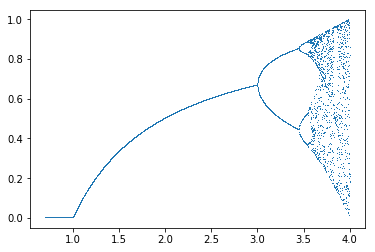

In [5]:
import matplotlib.pyplot as plt
import numpy as np

P = np.linspace(0.7, 4, 10000)
m = 0.7

X = []
Y = []

for u in P:
    X.append(u)

    m = np.random.random()
    for n in range(1001):
      m=(u*m)*(1-m)
        
    Y.append(m)

plt.plot(X, Y, ls='', marker=',')
plt.show()
